In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [80]:
df.shape

(10000, 3)

In [81]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Height'>

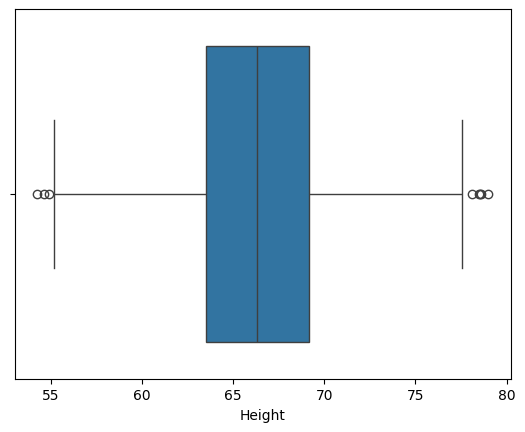

In [82]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Plot the boxplot
sns.boxplot(x='Height', data=df, orient='h')

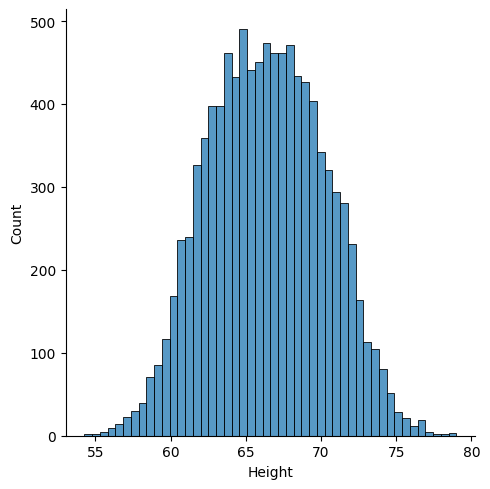

In [83]:
sns.displot(df['Height'])

In [84]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [85]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [86]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [87]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\mahes\AppData\Local\Temp\ipykernel_19784\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

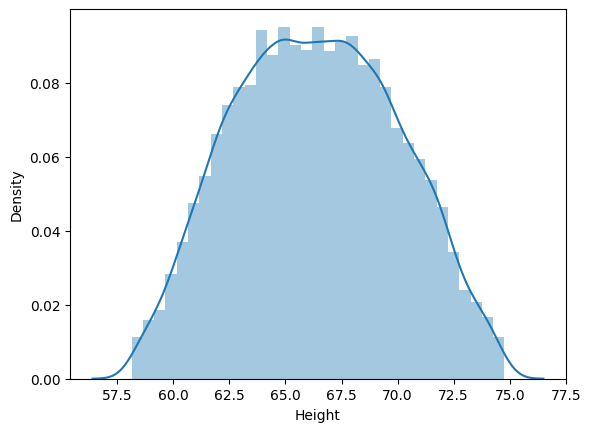

In [88]:
sns.distplot(new_df['Height'])

<Axes: xlabel='Height'>

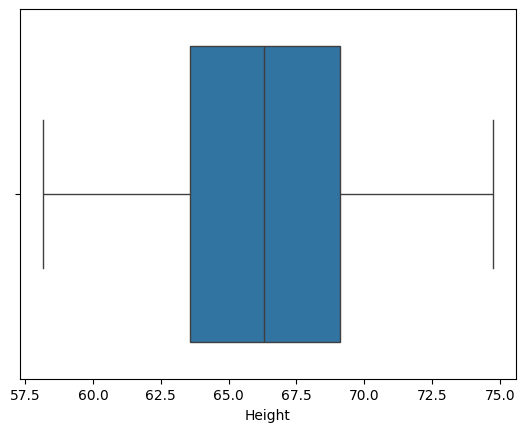

In [89]:
sns.boxplot(x='Height', data=new_df, orient='h')

In [90]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))


df.shape

(10000, 3)

In [91]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\mahes\AppData\Local\Temp\ipykernel_19784\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

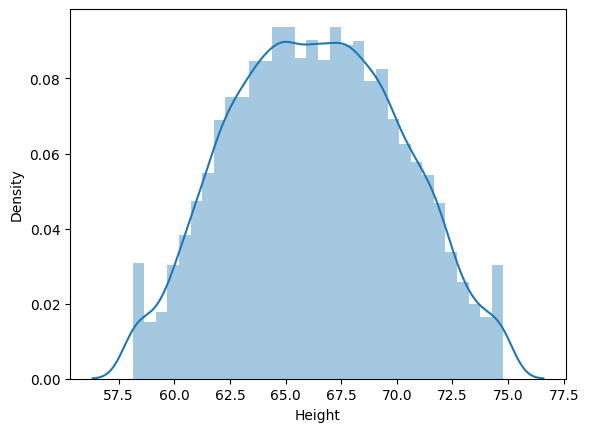

In [92]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

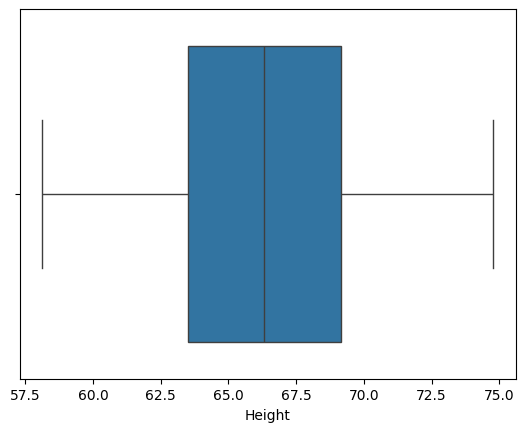

In [93]:
sns.boxplot(x='Height', data=df, orient='h')